# Descripción de los modelos a evaluar

**K-NN (K-Nearest Neighbors):** Este algoritmo clasifica un punto de datos en función de la mayoría de los puntos de datos cercanos a él. Es especialmente útil para la segmentación basada en similitud.

**Decision Tree (Árbol de Decisión):** Los árboles de decisión dividen los datos en función de reglas de decisión en forma de un árbol. Son fáciles de interpretar y pueden utilizarse para segmentaciones claras basadas en reglas.

**Random Forest (Bosque Aleatorio):** Un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión y reducir el sobreajuste. Puede ser útil para una segmentación robusta.

**XGBoost (Extreme Gradient Boosting):** Un algoritmo de aumento de gradientes extremos que se utiliza para tareas de segmentación y predicción. Es conocido por su alta eficacia y capacidad de manejar grandes conjuntos de datos.

**AdaBoost Regressor (AdaBoost con Regresión):** Utilizado para problemas de regresión, el algoritmo AdaBoost mejora gradualmente el rendimiento combinando múltiples modelos más simples.

**AdaBoost Classifier (AdaBoost con Clasificación):** Similar al AdaBoost Regressor, pero utilizado para problemas de clasificación.

**Extra Trees Regressor:** Una variante de Random Forest que agrega más aleatoriedad a la construcción de árboles, lo que puede llevar a una mayor robustez y generalización.

**Gradient Booster Regressor:** Este algoritmo entrena modelos en secuencia, donde cada modelo se ajusta a los errores del anterior, mejorando gradualmente el rendimiento en la predicción y la segmentación.

# Evaluación de Modelos

## K-MEANS PARA CLASIFICACIÓN

El objetivo principal del algoritmo K-Means es agrupar datos similares en clusters o grupos. Los clusters son conjuntos de puntos de datos que son similares entre sí en términos de características. Es importante destacar que K-Means no asigna etiquetas a los puntos de datos. Simplemente agrupa los datos en clusters basados en similitud. En este caso, se realiza una asignación dependiendo el número de cluster. Sin embargo, se utilizarán técnicas de clasificación supervisada como regresión logística, máquinas de soporte vectorial (SVM), árboles de decisión, entre otros.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('C:\\Users\\Edward Morales\\Downloads\\Data.csv', sep = ";")
df.head()
df_activos = df[df['Recency'] <= 48]
df_inactivos = df[df['Recency'] > 48]

2. Las variables Frecuencia, y Monetario se escalan en un rango discreto de 1 a 5, 1 siendo el mas bajo, y 5 siendo el mas alto. Esto se hace por medio de segmentación en cuantiles (20%, 40%, 60%, 80%, 100%).
3. La variable Recencia se escala, similar a Frecuencia y Monetario, en un rango discreto de 1 a 5, 1 siendo el mas reciente, y 5 siendo el menos reciente.

In [2]:
import pandas as pd
import numpy as np
#Calcular cuantiles
cuantiles_frequency = np.percentile(df_activos["Frequency"], [20, 40, 60, 80, 100])
cuantiles_monetario = np.percentile(df_activos["Monetario"], [20, 40, 60, 80, 100])

# Define una función para escalar los valores
def escalar(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5

# Aplica la función a las columnas correspondientes
df_activos["Frequency_Scaled"] = df_activos["Frequency"].apply(lambda x: escalar(x, cuantiles_frequency))
df_activos["Monetario_Scaled"] = df_activos["Monetario"].apply(lambda x: escalar(x, cuantiles_monetario))

#Calcular cuantiles
cuantiles_recency = np.percentile(df_activos["Recency"], [20, 40, 60, 80, 100])
def escalar_recency(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5
df_activos["Recency_Scaled"] = df_activos["Recency"].apply(lambda x: escalar_recency(x, cuantiles_recency))    

Se realiza el ejercicio tanto para los Usuarios Activos como los Inactivos.

In [3]:
import pandas as pd
import numpy as np
#Calcular cuantiles
cuantiles_frequency = np.percentile(df_inactivos["Frequency"], [20, 40, 60, 80, 100])
cuantiles_monetario = np.percentile(df_inactivos["Monetario"], [20, 40, 60, 80, 100])

# Define una función para escalar los valores
def escalar(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5

# Aplica la función a las columnas correspondientes
df_inactivos["Frequency_Scaled"] = df_inactivos["Frequency"].apply(lambda x: escalar(x, cuantiles_frequency))
df_inactivos["Monetario_Scaled"] = df_inactivos["Monetario"].apply(lambda x: escalar(x, cuantiles_monetario))

#Calcular cuantiles
cuantiles_recency = np.percentile(df_inactivos["Recency"], [20, 40, 60, 80, 100])
def escalar_recency(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5
df_inactivos["Recency_Scaled"] = df_inactivos["Recency"].apply(lambda x: escalar_recency(x, cuantiles_recency))   

Una vez escalados los datos, se procede a crear y  entrenar el Modelo K-means para el conjunto de datos de Usuarios Activos. Se crea un objeto, en el cual se define el número de Clusters a crear (4).

In [4]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

# Seleccionar las columnas
X = df_activos[['Frequency_Scaled', 'Monetario_Scaled', 'Recency_Scaled']]

# Crea un objeto K-Means con el número de clusters
kmeans = KMeans(n_clusters=4)

# Entrenar el modelo K-Means
kmeans.fit(X)

# Asignar una etiqueta de cluster a cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_activos['Cluster'] = labels

A continuación procedemos con la visualización de los Clusters creados por el modelo. Se crea un gráfico en 3D donde se pueden evidenciar claramente cada uno de los clusters creados. Tenemos 4 para este ejercicio, identificados con color azul, amarillo, morado y verde.

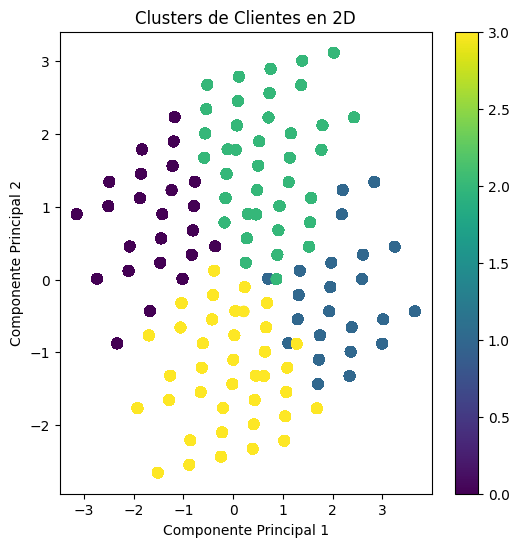

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Suponiendo que ya tienes un DataFrame llamado df_activos con las columnas 'Frequency_Scaled', 'Monetario_Scaled', y 'Recency_Scaled'

# Seleccionar las columnas
X = df_activos[['Frequency_Scaled', 'Monetario_Scaled', 'Recency_Scaled']]

# Crea un objeto K-Means con el número de clusters
kmeans = KMeans(n_clusters=4)

# Entrenar el modelo K-Means
kmeans.fit(X)

# Asignar una etiqueta de cluster a cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_activos['Cluster'] = labels

# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Graficar los clusters en 2D
plt.figure(figsize=(6, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters de Clientes en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()


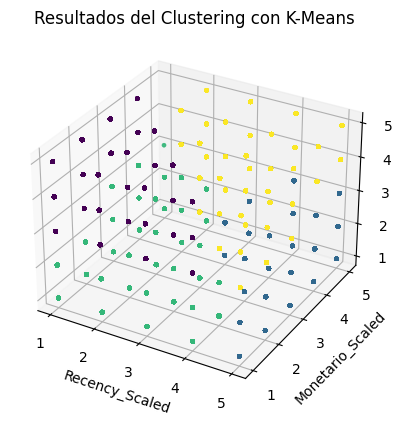

In [6]:
# Visualizar los resultados del clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_activos['Frequency_Scaled'], df_activos['Monetario_Scaled'], df_activos['Recency_Scaled'], c=labels, cmap='viridis', s=5)
ax.set_xlabel('Recency_Scaled')
ax.set_ylabel('Monetario_Scaled')
ax.set_zlabel('Frequency_Scaled')
ax.set_title('Resultados del Clustering con K-Means')
plt.show()

In [7]:
df_activos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster
4,35993.0,ATLANTICO,BARRANQUILLA,18/10/1931,93,Masculino,2,5,4,475000,4,1,1,3
14,71696.0,ATLANTICO,BARRANQUILLA,13/10/1930,94,Masculino,4,47,1,141900,1,1,5,0
23,84984.0,CESAR,VALLEDUPAR,10/11/1931,93,Femenino,5,16,3,476300,3,1,3,0
29,93091.0,MAGDALENA,SANTA MARTA (MAG),11/12/1945,79,Masculino,4,48,1,3292900,1,2,5,0
40,120698.0,ATLANTICO,BARRANQUILLA,10/06/1933,92,Masculino,5,28,3,420000,3,1,4,0


Como se mencionó al inicio, el modelo K-Means es ideal para agrupar los datos en clusters pero no asigna etiquetas. En este caso, procederemos a asignar manualmente una categoría a cada uno de los segmentos con el fin de evaluar más adelante modelos supervisados que nos puedan entregar las etiquetas y así poder comparar.

In [8]:
# Se asignan las etiquetas de clasificación
def asignaretiqueta(cluster):
    if cluster == 0:
        return "Nuevo"
    elif cluster == 1:
        return "Bronce"
    elif cluster == 2:
        return "Plata"
    elif cluster == 3:
        return "Diamante"

df_activos['Segmento'] = df_activos['Cluster'].apply(asignaretiqueta)
df_activos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster,Segmento
4,35993.0,ATLANTICO,BARRANQUILLA,18/10/1931,93,Masculino,2,5,4,475000,4,1,1,3,Diamante
14,71696.0,ATLANTICO,BARRANQUILLA,13/10/1930,94,Masculino,4,47,1,141900,1,1,5,0,Nuevo
23,84984.0,CESAR,VALLEDUPAR,10/11/1931,93,Femenino,5,16,3,476300,3,1,3,0,Nuevo
29,93091.0,MAGDALENA,SANTA MARTA (MAG),11/12/1945,79,Masculino,4,48,1,3292900,1,2,5,0,Nuevo
40,120698.0,ATLANTICO,BARRANQUILLA,10/06/1933,92,Masculino,5,28,3,420000,3,1,4,0,Nuevo


El conjunto de Datos de Usuarios Inactivos no se procesa bajo el modelo de K-Means porque este grupo de usuarios ya es considerado un Cluster. Se Prodece a modificar el dataframe, agregando manualmente las columnas Cluster y Segmento con el fin de poder unificar este dataframe con el de usuarios Activos.

In [9]:
df_inactivos['Cluster'] = '4'
df_inactivos['Segmento'] = 'Inactivo'
df_inactivos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster,Segmento
0,20888.0,ATLANTICO,BARRANQUILLA,9/03/1928,97,Masculino,6,70,2,204000,4,1,3,4,Inactivo
1,25220.0,ATLANTICO,BARRANQUILLA,23/04/1953,72,Masculino,5,92,1,1443498,1,2,5,4,Inactivo
2,31903.0,CESAR,VALLEDUPAR,18/05/1927,98,Femenino,6,97,1,1555569,1,2,5,4,Inactivo
3,35796.0,ATLANTICO,BARRANQUILLA,9/02/1928,97,Masculino,6,82,2,251999,4,1,4,4,Inactivo
5,37332.0,ATLANTICO,BARRANQUILLA,29/06/1936,89,Masculino,4,79,1,122000,1,1,4,4,Inactivo


Unificamos ambos dataframes para otener un solo conjunto de datos.

In [10]:
df = pd.concat([df_activos, df_inactivos], axis=0, ignore_index=True)

Obtenemos la siguiente distribución de usuarios por segmento, donde se evidencia que los Usuarios inativos tienen una distribución mucho mayor. Esto es clave para que el área de mercadeo implemente estrategias que incentiven a los usuarios a hacer compras. Los usuarios Diamante y  distribución muy similar con aproximado 55mil usuarios y los usurios Nuevos y Plata también se comportan muy parecido con un aproximado de 87mil usuarios.

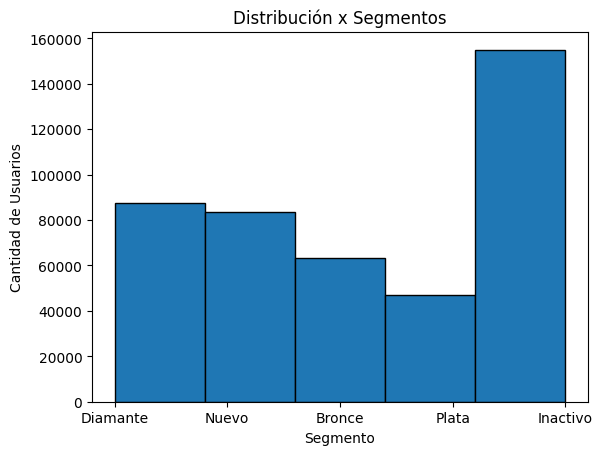

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
gfrecuencia = df['Segmento']

plt.hist(gfrecuencia, bins=5, edgecolor='k') 

plt.xlabel('Segmento')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución x Segmentos')

plt.show()

Finalmente, obtenemos un resumen de los datos por segmento. Estos datos proporcionan información sobre diferentes segmentos de usuarios, incluyendo el número de usuarios, cuán recientes son sus interacciones, con qué frecuencia interactúan y cuál es su valor monetario promedio. Estos detalles son valiosos para la segmentación de clientes y la toma de decisiones comerciales.

In [13]:
import pandas as pd

Tabla = df.groupby('Segmento').agg({
    'Identificacion': 'nunique',  # Recuento distinto de usuarios
    'Recency': 'mean',            # Promedio de Recency
    'Frequency': 'mean',          # Promedio de Frequency
    'Monetario': 'mean'           # Promedio de Monetario
}).reset_index()

Tabla.columns = ['Segmento', 'Usuarios', 'Recencia', 'Frecuencia', 'Monetario']
Tabla = Tabla.round(0)
print(Tabla)


   Segmento  Usuarios  Recencia  Frecuencia   Monetario
0    Bronce     63134       7.0         6.0  10132433.0
1  Diamante     87282       9.0         2.0   4738658.0
2  Inactivo    154978      70.0         2.0   2275067.0
3     Nuevo     83482      34.0         2.0   2897449.0
4     Plata     47041      29.0         4.0   6954262.0


**VIF**

Se Realiza reducción de dimensionalidad por medio de eliminiación de columnas altamente correlacionadas usando Variance Inflation Factor (VIF). Variables con un VIF mayor o igual a 5, indican posible multicolinealidad por lo tanto, se eliminan del conjunto de datos. Inicialmente, se eliminan del conjunto de datos las variables str.


In [14]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = df.drop(columns=['Departamento','Localidad','Genero','Fecha_Nacimiento','Segmento'])

In [15]:
num_columns = df.select_dtypes(include=[np.number])
vif1 = pd.DataFrame()
vif1["Variable"] = num_columns.columns
vif1["VIF"] = [variance_inflation_factor(num_columns.values, i) for i in range(num_columns.shape[1])]

Se identifican las variables con un VIF mayor a 5, y se procede con la eliminación del modelo.

In [16]:
VIF5 = vif1[vif1["VIF"] >= 5]
print(VIF5)

           Variable        VIF
1              Edad  13.002166
3           Recency   7.281547
4         Frequency  11.371990
5         Monetario  18.519116
6  Frequency_Scaled  12.123536
7  Monetario_Scaled  21.438869
8    Recency_Scaled   8.060663


In [17]:
df = df.drop(columns=['Edad','Recency','Frequency','Monetario'])

In [18]:
df.head()

,Identificacion,Estrato,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster
0,35993.0,2,4,1,1,3
1,71696.0,4,1,1,5,0
2,84984.0,5,3,1,3,0
3,93091.0,4,1,2,5,0
4,120698.0,5,3,1,4,0


In [19]:
df['Cluster'] = pd.to_numeric(df['Cluster'], errors='coerce', downcast='integer')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435917 entries, 0 to 435916
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Identificacion    435917 non-null  float64
 1   Estrato           435917 non-null  int64  
 2   Frequency_Scaled  435917 non-null  int64  
 3   Monetario_Scaled  435917 non-null  int64  
 4   Recency_Scaled    435917 non-null  int64  
 5   Cluster           435917 non-null  int8   
dtypes: float64(1), int64(4), int8(1)
memory usage: 17.0 MB


## MODELOS DE CLASIFICACIÓN

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = df.drop(columns=['Cluster'])
y = df['Cluster']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Definir los modelos
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()


In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Crear pipelines para cada modelo
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características para K-NN
    ('knn', knn_model)
])

tree_pipeline = Pipeline([
    ('tree', tree_model)
])

rf_pipeline = Pipeline([
    ('rf', rf_model)
])

xgb_pipeline = Pipeline([
    ('xgb', xgb_model)
])


In [84]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a buscar para cada modelo
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

param_grid_tree = {
    'tree__max_depth': [None, 5, 10],
    'tree__min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10]
}

param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Realizar la búsqueda de hiperparámetros y validación cruzada para cada modelo
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='roc_auc')
grid_search_tree = GridSearchCV(tree_pipeline, param_grid_tree, cv=5, scoring='roc_auc')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='roc_auc')

# Ajustar los modelos a los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=N...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix #, plot_roc_curve

# Función para calcular y registrar las métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovr')
    return precision, recall, f1, auc

# Evaluar cada modelo
knn_metrics = evaluate_model(grid_search_knn, X_test, y_test)
tree_metrics = evaluate_model(grid_search_tree, X_test, y_test)
rf_metrics = evaluate_model(grid_search_rf, X_test, y_test)
xgb_metrics = evaluate_model(grid_search_xgb, X_test, y_test)

In [87]:
#Registrar resultados
results_df = pd.DataFrame({
    'Modelo': ['K-NN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Precisión': [knn_metrics[0], tree_metrics[0], rf_metrics[0], xgb_metrics[0]],
    'Recall': [knn_metrics[1], tree_metrics[1], rf_metrics[1], xgb_metrics[1]],
    'Puntuación F1': [knn_metrics[2], tree_metrics[2], rf_metrics[2], xgb_metrics[2]],
    'AUC': [knn_metrics[3], tree_metrics[3], rf_metrics[3], xgb_metrics[3]]
})

print(results_df)

          Modelo  Precisión    Recall  Puntuación F1       AUC
0           K-NN   0.707180  0.707771       0.707366  0.870820
1  Decision Tree   0.691250  0.691646       0.691442  0.783900
2  Random Forest   0.691762  0.692184       0.691964  0.888387
3        XGBoost   0.701311  0.704922       0.701869  0.897547


## Decision Tree

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [25]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=3)  # Puedes ajustar la profundidad máxima y otros parámetros
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

Accuracy: 0.5835933198752065
              precision    recall  f1-score   support

           0       0.78      0.38      0.51     16717
           1       0.48      1.00      0.65     12471
           2       0.77      0.60      0.68      9584
           3       0.93      0.36      0.51     17268
           4       0.52      0.65      0.57     31144

    accuracy                           0.58     87184
   macro avg       0.69      0.60      0.59     87184
weighted avg       0.67      0.58      0.57     87184



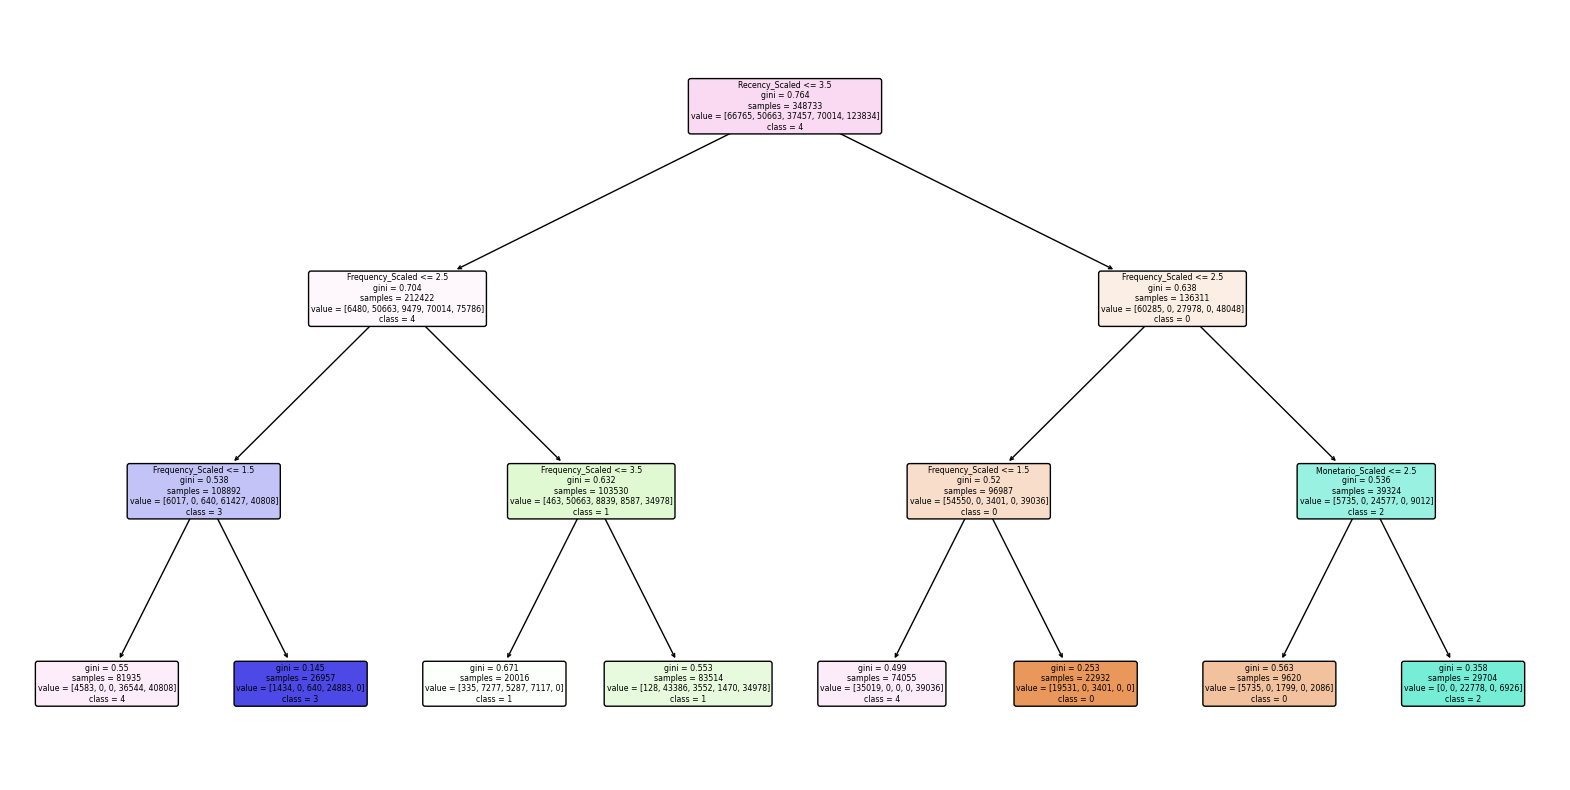

In [26]:
y_pred = clf.predict(X_test)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Convertir las etiquetas de clase a cadenas
class_names_str = [str(cls) for cls in clf.classes_]

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names_str, rounded=True)
plt.show()
